# 1.0 An end-to-end classification problem (Part I)



## 1.1 Dataset description



We'll be looking at individual income in the United States. The **data** is from the **1994 census**, and contains information on an individual's **marital status**, **age**, **type of work**, and more. The **target column**, or what we want to predict, is whether individuals make less than or equal to 50k a year, or more than **50k a year**.

You can download the data from the [University of California, Irvine's website](http://archive.ics.uci.edu/ml/datasets/Adult).

Let's take the following steps:

1. Load Libraries
2. Fetch Data, including EDA
3. Pre-procesing
4. Data Segregation

<center><img width="600" src="https://drive.google.com/uc?export=view&id=1a-nyAPNPiVh-Xb2Pu2t2p-BhSvHJS0pO"></center>

## 1.2 Load libraries

In [1]:
import wandb
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from pandas_profiling import ProfileReport
from sklearn.model_selection import train_test_split
import tempfile
import os

## 1.3 Get data & Exploratory Data Analysis (EDA)

### 1.3.1 Create the raw_data artifact

In [2]:
# columns used 
columns = ['age', 'workclass', 'fnlwgt', 'education', 'education_num',
           'marital_status', 'occupation', 'relationship', 'race', 
           'sex','capital_gain', 'capital_loss', 'hours_per_week',
           'native_country','high_income']
# importing the dataset
income = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data",
                   header=None,
                   names=columns)
income.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,high_income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [3]:
income.to_csv("raw_data.csv",index=False)

In [4]:
# Login to Weights & Biases
wandb.login(relogin=True)

wandb: You can find your API key in your browser here: https://wandb.ai/authorize


wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:  ········································


wandb: Appending key for api.wandb.ai to your netrc file: /Users/ivanovitchsilva/.netrc


True

In [5]:
# Send the raw_data.csv to the Wandb storing it as an artifact
!wandb artifact put \
      --name week_07_eda/raw_data.csv \
      --type raw_data \
      --description "The raw data from 1994 US Census" raw_data.csv

wandb: Uploading file raw_data.csv to: "ivanovitchm/week_07_eda/raw_data.csv:latest" (raw_data)
wandb: Currently logged in as: ivanovitchm (use `wandb login --relogin` to force relogin)
wandb: Tracking run with wandb version 0.12.9
wandb: Syncing run sparkling-galaxy-1
wandb:  View project at https://wandb.ai/ivanovitchm/week_07_eda
wandb:  View run at https://wandb.ai/ivanovitchm/week_07_eda/runs/1a65houh
wandb: Run data is saved locally in /Users/ivanovitchsilva/mlops/week_07/Example_01/wandb/run-20211229_144712-1a65houh
wandb: Run `wandb offline` to turn off syncing.

Artifact uploaded, use this artifact in a run by adding:

    artifact = run.use_artifact("ivanovitchm/week_07_eda/raw_data.csv:latest")


wandb: Waiting for W&B process to finish, PID 18283... (success).
wandb:                                                                                
wandb: Synced 6 W&B file(s), 0 media file(s), 1 artifact file(s) and 0 other file(s)
wandb: Synced sparkling-galaxy-1: https://wan

### 1.3.2 Download raw_data artifact from Wandb

In [6]:
# save_code tracking all changes of the notebook and sync with Wandb
run = wandb.init(project="week_07_eda", save_code=True)

wandb: Currently logged in as: ivanovitchm (use `wandb login --relogin` to force relogin)


In [7]:
# donwload the latest version of artifact raw_data.csv
artifact = run.use_artifact("week_07_eda/raw_data.csv:latest")

# create a dataframe from the artifact
df = pd.read_csv(artifact.file())

In [8]:
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,high_income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  high_income     32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [10]:
df.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


### 1.3.3 Pandas Profilling

In [11]:
ProfileReport(df, title="Pandas Profiling Report", explorative=True)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [12]:
# There are duplicated rows
df.duplicated().sum()

24

In [13]:
# Delete duplicated rows
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

### 1.3.4 EDA Manually

In [15]:
# what the sex column can help us?
pd.crosstab(df.high_income,df.sex,margins=True,normalize=True)

sex,Female,Male,All
high_income,,,
<=50K,0.294526,0.464548,0.759074
>50K,0.036236,0.204690,0.240926
All,0.330762,0.669238,1.000000


In [16]:
# income vs [sex & race]?
pd.crosstab(df.high_income,[df.sex,df.race],margins=True)

sex                      Female                                           \
race         Amer-Indian-Eskimo  Asian-Pac-Islander  Black  Other  White   
high_income                                                                
 <=50K                      107                 303   1465    103   7605   
 >50K                        12                  43     90      6   1028   
All                         119                 346   1555    109   8633   

sex                        Male                                           \
race         Amer-Indian-Eskimo  Asian-Pac-Islander  Black  Other  White   
high_income                                                                
 <=50K                      168                 459   1270    143  13075   
 >50K                        24                 233    297     19   6087   
All                         192                 692   1567    162  19162   

sex            All  
race                
high_income         
 <=50K       24698  
 >50K         7839  
All          32537

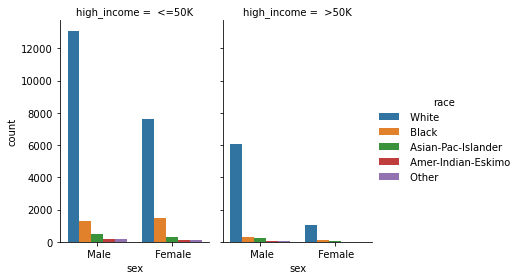

In [17]:
%matplotlib inline

sns.catplot(x="sex", 
            hue="race", 
            col="high_income",
            data=df, kind="count",
            height=4, aspect=.7)
plt.show()

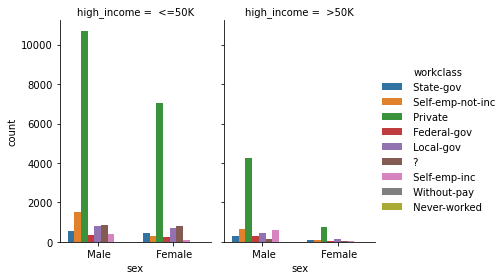

In [18]:
g = sns.catplot(x="sex", 
                hue="workclass", 
                col="high_income",
                data=df, kind="count",
                height=4, aspect=.7)

g.savefig("HighIncome_Sex_Workclass.png", dpi=100)

run.log(
        {
            "High_Income vs Sex vs Workclass": wandb.Image("HighIncome_Sex_Workclass.png")
        }
    )

In [19]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
high_income       0
dtype: int64

## 1.4 Train & Split

In [20]:
splits = {}
splits["train"], splits["test"] = train_test_split(df,
                                                   test_size=0.30,
                                                   random_state=41,
                                                   stratify=df["high_income"])

In [21]:
# Save the artifacts. We use a temporary directory so we do not leave
# any trace behind

with tempfile.TemporaryDirectory() as tmp_dir:

    for split, df in splits.items():

        # Make the artifact name from the provided root plus the name of the split
        artifact_name = f"data_{split}.csv"

        # Get the path on disk within the temp directory
        temp_path = os.path.join(tmp_dir, artifact_name)

        # Save then upload to W&B
        df.to_csv(temp_path,index=False)

        artifact = wandb.Artifact(
            name=artifact_name,
            type="raw_data",
            description=f"{split} split of dataset week_07_eda/raw_data.csv:latest",
        )
        artifact.add_file(temp_path)

        run.log_artifact(artifact)

        # This waits for the artifact to be uploaded to W&B. If you
        # do not add this, the temp directory might be removed before
        # W&B had a chance to upload the datasets, and the upload
        # might fail
        artifact.wait()

### 1.4.1 Donwload the train and test artifacts

In [22]:
# donwload the latest version of artifacts data_test.csv and data_train.csv
artifact_train = run.use_artifact("week_07_eda/data_train.csv:latest")
artifact_test = run.use_artifact("week_07_eda/data_test.csv:latest")

# create a dataframe from each artifact
df_train = pd.read_csv(artifact_train.file())
df_test  = pd.read_csv(artifact_test.file())

In [23]:
print("Train: {}".format(df_train.shape))
print("Test: {}".format(df_test.shape))

Train: (22775, 15)
Test: (9762, 15)


In [ ]:
run.finish()